In [1]:
# Image Gradients
# 이미지 내에서 픽셀값의 변화가 큰 경계선, 모서리 부분을 찾는데 쓰인다.
# 1. Sobel, Scharr Filter
# Gaussian Smoothing과 미분을 이용한 방법으로 노이즈가 있는 이미지에 적용 가능하다.
# 1차 미분연산으로 X축과 Y축을 각각 미분하는 방법으로 경계를 계산한다.
# 미분 필터는 가로, 세로가 같고 홀수이어야 하며
# 중심을 기준으로 상하좌우 대칭(Roberts 제외)이고
# 모든 수의 합은 0이다.

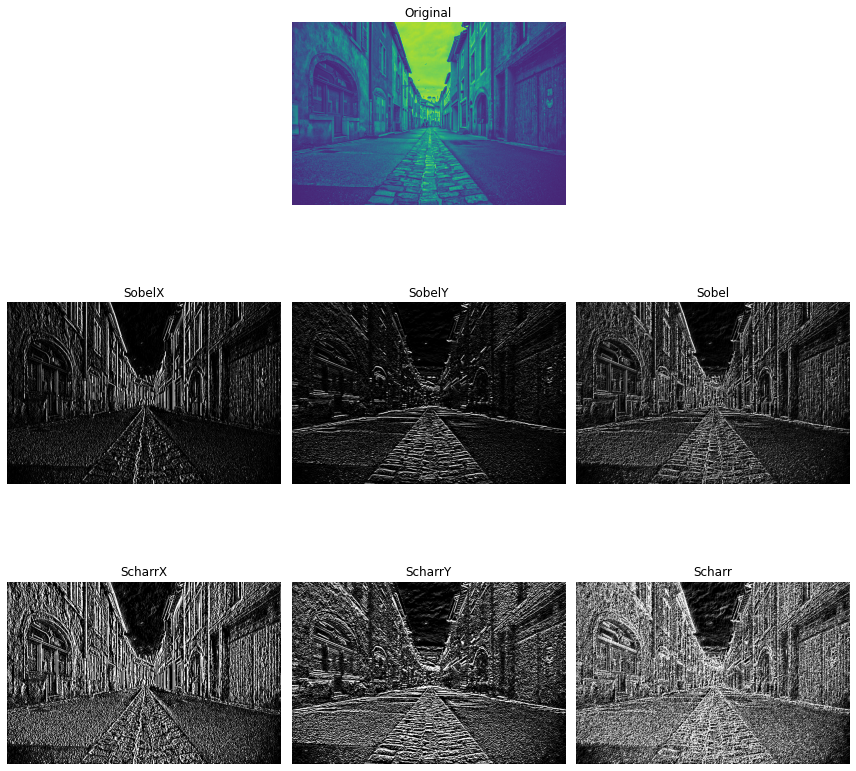

In [1]:
# cv2.Sobel(src,ddepth,dx,dy[,dst[,ksize[,dcale[,delta[,borderType]]]]])
# ddepth : 출력 이미지의 데이터 형태. -1이면 입력 이미지와 동일하게 출력
# dx,dy: x,y축 미분 차수
# ksize : 커널 사이즈. Sobel Filter는 1,3,5,7이 가능하고 Default는 3이다.
# 1. Sobel Filter : ksize=3이고 dx=1 이면 [[-1,0,1],[-2,0,2],[-1,0,1]]가 적용되고 
# dy=1 이면 [[-1,-2,-1],[0,0,0],[1,2,1]] 가 적용된다
# 2. Scharr Filter : [[-3,0,3],[-10,0,10],[-3,0,3]]으로 Sobel Filter에서 숫자만 다르다.
# ksize = -1(cv2.FILTER_SCHARR)로 설정하면 Sobel Filter가 아닌 Scharr Filter가 적용된다.
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('city1.jpg',cv2.IMREAD_GRAYSCALE)

sobelX = cv2.Sobel(img,-1,1,0,ksize=3)
sobelY = cv2.Sobel(img,-1,0,1,ksize=3)
sobel = sobelX + sobelY

scharrX = cv2.Sobel(img,-1,1,0,ksize=cv2.FILTER_SCHARR)
scharrY = cv2.Sobel(img,-1,0,1,ksize=cv2.FILTER_SCHARR)
scharr = scharrX+scharrY

titles = ['Original','SobelX','SobelY','Sobel','ScharrX','ScharrY','Scharr']
images = [img,sobelX,sobelY,sobel,scharrX,scharrY,scharr]
plt.figure(figsize=(12,12))
plt.subplot(3,3,2)
plt.imshow(images[0])
plt.title(titles[0])
plt.axis('off')
for i in range(1,len(images)):
    plt.subplot(3,3,i+3)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.savefig('Sobel_Scharr.jpg')
plt.show()

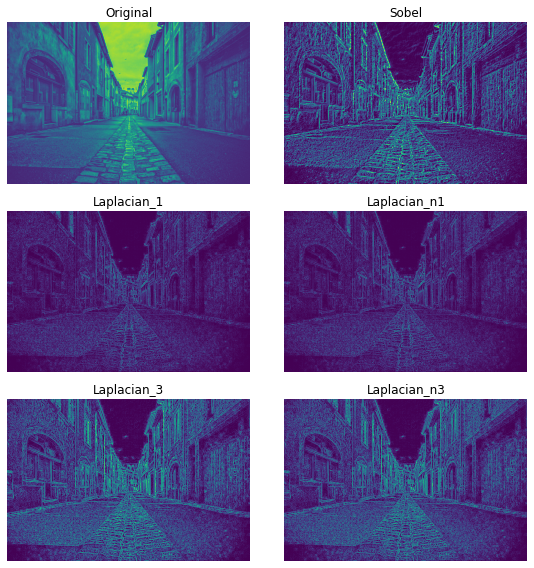

In [7]:
# 2. Laplacian Filter
# Sobel,Scharr Filter와 달리 Gradient를 2차 미분하여 원본과 합성곱하는 필터이다.
# 1차 미분의 크기는 경계의 존재 여부, 2차 미분의 부호는 경계선의 화소가 밝은 부분에 있는지
# 어두운 부분에 있는지 결정하는데 사용된다.
# 2차 미분 방식을 사용하면 저주파 성분에 해당하는 값들이 소거가 되고
# 고주파는 선명하게 나타나므로 경계선 부분을 강조할 수 있다.
# Laplacian Filter = [[0,1,0],[1,-4,1],[0,1,0]],[[1,1,1],[1,-8,1],[1,1,1]]
# cv2.Laplacian(src,ddepth,[,dst[,ksize[,scale[,delta[,borderType]]]]])
# ksize : 31이하의 홀수만 가능. Default는 1이고 앞의 필터, 3일 때는 뒤의 필터가 적용된다.
# Laplacian Filter는 잡음에 민감하여 Gaussian Filtering으로 노이즈를 제거하고 적용하는
# LoG(Laplacian of Gaussian)방법을 사용한다.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('city1.jpg',cv2.IMREAD_GRAYSCALE)

img_laplacian1 = cv2.Laplacian(img,-1,ksize=1)
img_laplacian3 = cv2.Laplacian(img,-1,ksize=3)
# numpy로 만든 Laplacian Filter
laplacian_filter1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacian_filter3 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
img_laplacian1_n = cv2.filter2D(img,-1,laplacian_filter1)
img_laplacian3_n = cv2.filter2D(img,-1,laplacian_filter3)
# Sobel Filter로 2번 미분
img_sobelX = cv2.Sobel(img,-1,1,0,ksize=3)
img_sobelY = cv2.Sobel(img,-1,0,1,ksize=3)
img_sobel = img_sobelX + img_sobelY

titles = ['Original','Sobel','Laplacian_1','Laplacian_n1','Laplacian_3','Laplacian_n3']
images = [img,img_sobel,img_laplacian1,img_laplacian1_n,img_laplacian3,img_laplacian3_n]
plt.figure(figsize=(8,8))
for i in range(len(images)):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.savefig('Laplacian.jpg')
plt.show()

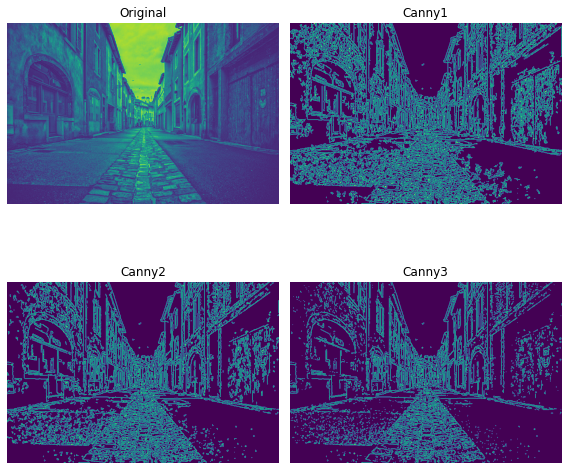

In [8]:
# 3. Canny Edge Detection
# 경계선 검출에서 가장 많이 사용하는 알고리즘.
# 1. Gaussian Filter로 이미지의 잡음 제거한다.
# 2. Sobel Filter로 Gradient의 강도를 구한다.
# 3. Non-maximum Suppression을 적용하여 Edge가 아닌 픽셀 제거
# 4. Hysteresis Thresholding 방식을 적용한다. maxVal, minVal을 설정하고
# maxVal 이상은 Strong Edge, min과 max사이는 Weak Edge, minVal 이하는 제거한다.
# cv2.Canny(img,threshold1,threshold2[,edges[,apertureSize[,L2gradient]]]) -> edges
# threshold1 : Hysteresis를 위한 임계값 1
# threshold2 : Hysteresis를 위한 임계값 2
# 두 임계값 중 큰 값이 maxVal, 작은 값이 minVal이 된다.
# 일반적으로 threshold1이 threshold2 보다 작게 한다.
# apetureSize : Sobel Filter의 크기. Sobel 함수처럼 3,5,7만 지정 가능
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('city1.jpg',cv2.IMREAD_GRAYSCALE)

img_canny1 = cv2.Canny(img,50,200)
img_canny2 = cv2.Canny(img,100,200)
img_canny3 = cv2.Canny(img,170,200)

titles = ['Original','Canny1','Canny2','Canny3']
images = [img,img_canny1,img_canny2,img_canny3]
plt.figure(figsize=(8,8))
for i in range(len(images)):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.savefig('Canny.jpg')
plt.show()

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nothing(x):
    pass
def edge_detection_img():
    img = cv2.imread('city1.jpg',cv2.IMREAD_GRAYSCALE)
    cv2.namedWindow('Edge Detection')
    cv2.createTrackbar('low threshold','Edge Detection',0,255,nothing)
    cv2.createTrackbar('high threshold','Edge Detection',0,255,nothing)
    cv2.imshow('Edge Detection',img)
    
    while True:
        if cv2.waitKey(1) & 0xFF == 27:
            break
        low = cv2.getTrackbarPos('low threshold','Edge Detection')
        high = cv2.getTrackbarPos('high threshold','Edge Detection')
        
        if low > high:
            print('Low Value must be lower than High Value')
        elif low == high:
            cv2.imshow('Edge Detection',img)
        else:
            img_canny = cv2.Canny(img,low,high)
            cv2.imshow('Edge Detection',img_canny)
    cv2.destroyAllWindows()

edge_detection_img()

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nothing(x):
    pass
def edge_detection_video():
    try:
        print("비디오 재생")
        cap = cv2.VideoCapture(1)
        cv2.namedWindow('Edge Detection')
        cv2.createTrackbar('low threshold','Edge Detection',0,255,nothing)
        cv2.createTrackbar('high threshold','Edge Detection',0,255,nothing)
    except:
        print("비디오 재생 실패")
        return
    
    while True:
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            if cv2.waitKey(5) & 0xFF == 27:
                break
            low = cv2.getTrackbarPos('low threshold','Edge Detection')
            high = cv2.getTrackbarPos('high threshold','Edge Detection')

            if low > high:
                print('Low Value must be lower than High Value')
            elif low == high:
                cv2.imshow('Edge Detection',frame)
            else:
                img_canny = cv2.Canny(frame,low,high)
                cv2.imshow('Edge Detection',img_canny)
        else:
            print("비디오 종료")
            break
    cv2.destroyAllWindows()
    cap.release()

edge_detection_video()

비디오 재생
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High Value
Low Value must be lower than High